<a href="https://colab.research.google.com/github/seemapr22/ChatGPT_Sentiment_Analysis/blob/main/ChatGPT_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importing Libraries

# import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   # to supress the warnings

# --Sklearn library--

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Reading Dataset**

In [5]:
# reading the dataset
df = pd.read_csv("/content/drive/MyDrive/chatgpt sentiment analysis/file_real.csv")

In [6]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [7]:
df['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [8]:
df.shape

(219294, 3)

# **Data Preprocessing**

In [9]:
# Map the labels to integers
# 0 for bad tweet
# 1 for good tweet
# 2 for neutral tweet

df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', 0, 2))

In [10]:
df=df[['tweets','lab_int']]

In [11]:
df.head()

,tweets,lab_int
0,ChatGPT: Optimizing Language Models for Dialog...,2
1,"Try talking with ChatGPT, our new AI system wh...",1
2,ChatGPT: Optimizing Language Models for Dialog...,2
3,"THRILLED to share that ChatGPT, our new model ...",1
4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [12]:
# View the first 20 rows in the tweets column

for i in df.tweets.head(20):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [13]:
# Remove all the tweet links since they all begin with https:

df['tweet_list'] = df['tweets'].str.split('https:')

In [14]:
# Select the text part of the list
text = [i[0] for i in df['tweet_list']]

In [15]:
df['text'] = text

In [16]:
df=df.dropna()
df=df[['text','lab_int']]

In [17]:
df.head()

,text,lab_int
0,ChatGPT: Optimizing Language Models for Dialogue,2
1,"Try talking with ChatGPT, our new AI system wh...",1
2,ChatGPT: Optimizing Language Models for Dialogue,2
3,"THRILLED to share that ChatGPT, our new model ...",1
4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [18]:
# Get the independent Feature

X = df.drop('lab_int',axis=1)

In [19]:
# get the dependent feature

y = df['lab_int']

In [20]:
# Vocabulary size
voc_size=20000

Onehot Representation

In [21]:
messages=X.copy()

In [22]:
messages.reset_index(inplace=True)

In [23]:
# dataset preprocessing

ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  #print(i)
  review=re.sub('[^a-zA-z]', ' ', messages['text'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [25]:
corpus[:5]

['chatgpt optim languag model dialogu',
 'tri talk chatgpt new ai system optim dialogu feedback help us improv',
 'chatgpt optim languag model dialogu',
 'thrill share chatgpt new model optim dialog public free access everyon',
 'minut ago openai releas new chatgpt \\n\\nand use right']

In [26]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr[:5]

[[18317, 4983, 6667, 4092, 14034],
 [5011,
  10290,
  18317,
  16232,
  11257,
  12799,
  4983,
  14034,
  10663,
  18486,
  16057,
  13710],
 [18317, 4983, 6667, 4092, 14034],
 [4905, 12798, 18317, 16232, 4092, 4983, 19392, 13195, 17541, 2191, 18993],
 [8229, 19353, 13596, 2920, 16232, 18317, 19055, 14801, 8357, 5930]]

In [28]:
max_len = max([len(x) for x in onehot_repr])
max_len

54

In [29]:
# Padding
#sent_length = 25
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=max_len)
print(embedded_docs)

[[    0     0     0 ...  6667  4092 14034]
 [    0     0     0 ... 18486 16057 13710]
 [    0     0     0 ...  6667  4092 14034]
 ...
 [    0     0     0 ... 18317  7211 17038]
 [    0     0     0 ... 11123  3398   200]
 [    0     0     0 ... 18317  5393  9694]]


# **Model Building**

In [30]:
# Creating model
embedding_vector_features=40

model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 40)            800000    
                                                                 
 dropout (Dropout)           (None, 54, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 856703 (3.27 MB)
Trainable params: 856703 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
len(embedded_docs),y.shape

(219294, (219294,))

In [32]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((219294, 25), (219294,))

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=1)

# **Model Training**

In [35]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [36]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=callback)

Epoch 1/100
3838/3838 [==============================] - 84s 20ms/step - loss: 0.5451 - accuracy: 0.7860 - val_loss: 0.4268 - val_accuracy: 0.8408
Epoch 2/100
3838/3838 [==============================] - 32s 8ms/step - loss: 0.4097 - accuracy: 0.8483 - val_loss: 0.4006 - val_accuracy: 0.8489
Epoch 3/100
3838/3838 [==============================] - 30s 8ms/step - loss: 0.3699 - accuracy: 0.8643 - val_loss: 0.4017 - val_accuracy: 0.8464
Epoch 4/100
3838/3838 [==============================] - 28s 7ms/step - loss: 0.3406 - accuracy: 0.8749 - val_loss: 0.4043 - val_accuracy: 0.8483
Epoch 5/100
3838/3838 [==============================] - 31s 8ms/step - loss: 0.3163 - accuracy: 0.8850 - val_loss: 0.4015 - val_accuracy: 0.8529
Epoch 6/100
3838/3838 [==============================] - 31s 8ms/step - loss: 0.2951 - accuracy: 0.8935 - val_loss: 0.4170 - val_accuracy: 0.8488
Epoch 7/100
3838/3838 [==============================] - 31s 8ms/step - loss: 0.2746 - accuracy: 0.9009 - val_loss: 0.4405 

In [37]:
y_pred_probs = model.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)  # Get the index of the highest probability for each sample

print(y_pred_classes)

2056/2056 [==============================] - 6s 3ms/step
[1 1 2 ... 0 1 2]


# **Performance matrix and accuracy**

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
accuracy_score(y_test,y_pred_classes)

0.8382708355500159

In [40]:
confusion_matrix(y_test,y_pred_classes)

array([[28986,   668,  2634],
       [  751, 14028,  2012],
       [ 2418,  2157, 12135]])

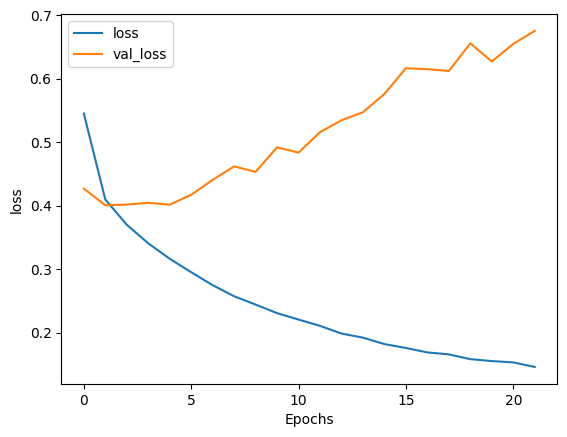

In [41]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

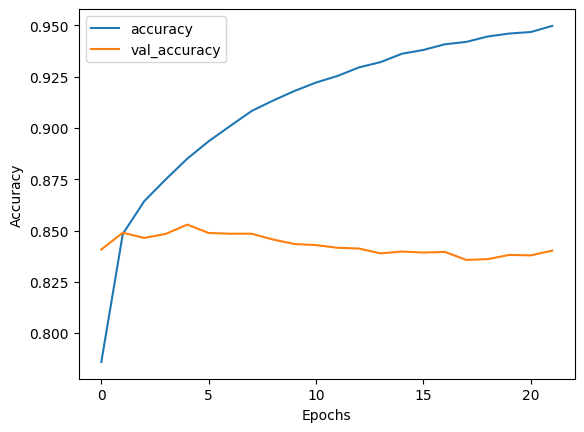

In [42]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()